<a href="https://colab.research.google.com/github/angiegh2002/language_app/blob/main/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 10.1 MB/s eta 0:00:00


In [ ]:
# !curl -X GET  "https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train"

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_parquet("/content/drive/MyDrive/Dataset data/data.parquet")


In [4]:
dataset.head()

word                                         definition
0       تمنيع ذاتي  تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1  مَسارٌ هاملتوني  مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2           الكلمة  أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3              طرف     الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4            الاسم  كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...

In [5]:
dataset.shape

(58607, 2)

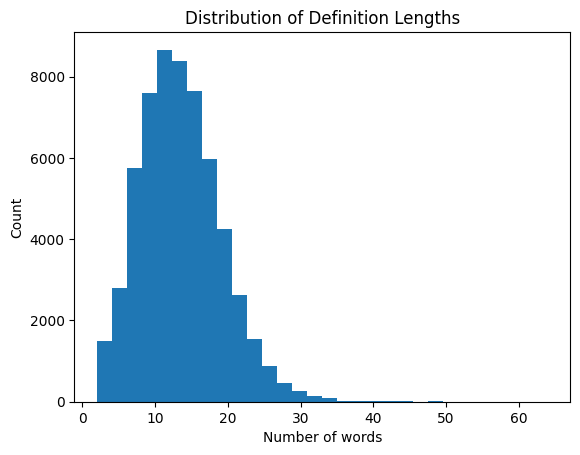

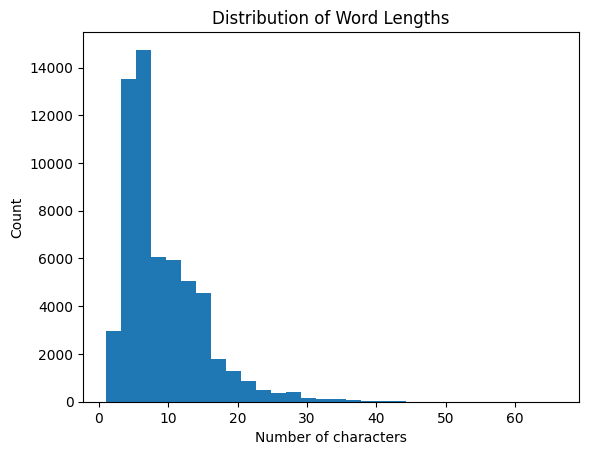

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
def_lengths = [len(str(row['definition']).split()) for index, row in dataset.iterrows() if row['definition'] is not None]
word_lengths = [len(str(row['word'])) for index, row in dataset.iterrows() if row['word'] is not None]

plt.hist(def_lengths, bins=30)
plt.title("Distribution of Definition Lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

plt.hist(word_lengths, bins=30)
plt.title("Distribution of Word Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

In [7]:
definitions = [row['definition'] for index, row in dataset.iterrows()]
words = [row['word'] for index, row in dataset.iterrows()]

print(f"Missing definitions: {sum([d is None for d in definitions])}")
print(f"Missing words: {sum([w is None for w in words])}")

print(f"Unique words: {len(set(words))}")

Missing definitions: 0
Missing words: 2
Unique words: 35617


In [8]:
dataset_clean = dataset.dropna(subset=['word'])
print(f"بعد التنظيف: {len(dataset_clean)} صف")


بعد التنظيف: 58605 صف


In [9]:
dataset_clean.duplicated().sum()

np.int64(61)

In [10]:
dataset_clean = dataset_clean.drop_duplicates()
print(f"بعد التنظيف: {len(dataset_clean)} صف")

بعد التنظيف: 58544 صف


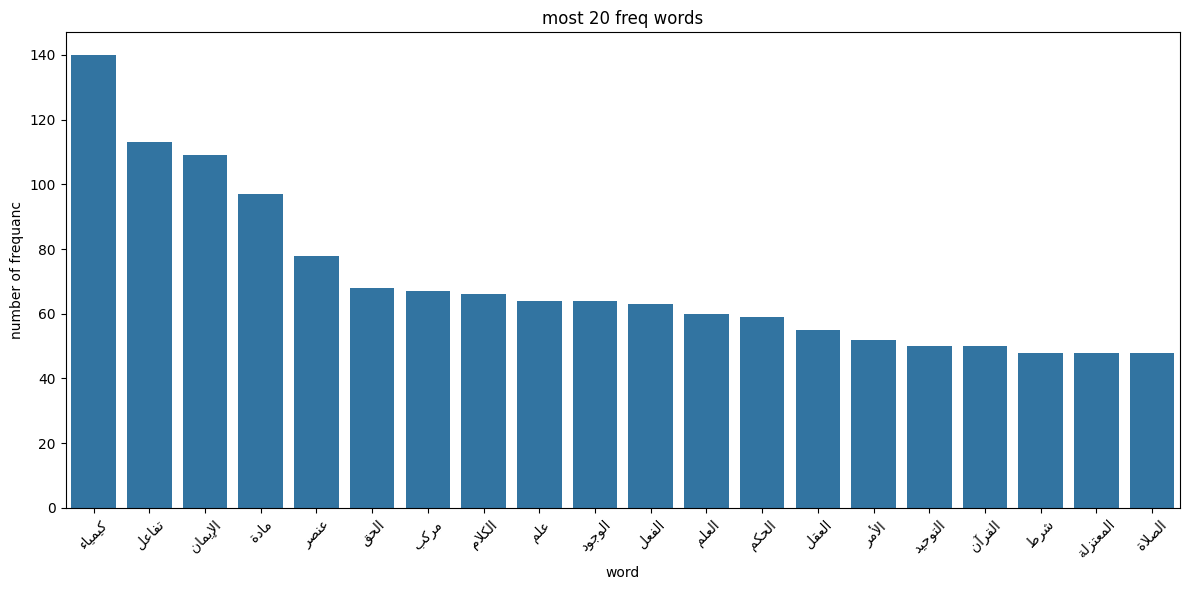

In [11]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

word_counter = Counter(dataset_clean["word"])
common_words = word_counter.most_common(20)

reshaped_words = [arabic_reshaper.reshape(word) for word, _ in common_words]
bidi_words = [get_display(w) for w in reshaped_words]
counts = [count for _, count in common_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bidi_words, y=counts)
plt.xticks(rotation=45)
plt.title("most 20 freq words")
plt.xlabel("word")
plt.ylabel("number of frequanc")
plt.tight_layout()
plt.show()


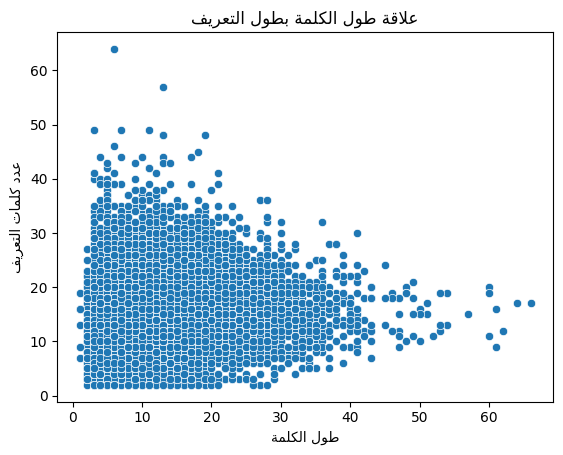

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

dataset_clean["word_length"] = dataset_clean["word"].apply(len)
dataset_clean["def_length"] = dataset_clean["definition"].apply(lambda x: len(str(x).split()))

sns.scatterplot(data=dataset_clean, x="word_length", y="def_length")

title_reshaped = arabic_reshaper.reshape("علاقة طول الكلمة بطول التعريف")
title_bidi = get_display(title_reshaped)
plt.title(title_bidi)

xlabel_reshaped = arabic_reshaper.reshape("طول الكلمة")
xlabel_bidi = get_display(xlabel_reshaped)
plt.xlabel(xlabel_bidi)

ylabel_reshaped = arabic_reshaper.reshape("عدد كلمات التعريف")
ylabel_bidi = get_display(ylabel_reshaped)
plt.ylabel(ylabel_bidi)

plt.show()

In [13]:
rare_words = word_counter.most_common()[-20:]
print("كلمات نادرة في البيانات:", [w for w, _ in rare_words])


كلمات نادرة في البيانات: ['طيف إصدار', 'بيان موجه ضعيف الترابط', 'ذراع', 'مصفوفة مهيمنة قطرية', 'قاعدة عضوية', 'قاعدة الميزان', 'منظار الحنجرة', 'عدد ماخ', 'الحشاشون', 'تکلید مشع', 'جزيئات', 'مُؤَشِّرُ الأسعار', 'يُعجب', 'تقسيم منتشر', 'الـشراء', 'الأخيف', 'السَّعْي إِذا كَانَ', 'الحاجات', 'مُبَرّد بيني', 'مُبَرْهَنةُ التَّمْدِيدِ لِتِيتُس']


In [14]:
dataset_clean["starts_with"] = dataset_clean["definition"].apply(lambda x: str(x).strip().split(" ")[0])
starts_freq = Counter(dataset_clean["starts_with"])
print("أكثر الكلمات بداية للتعريف:", starts_freq.most_common(10))


أكثر الكلمات بداية للتعريف: [('هو', 2703), ('مصطلح', 2159), ('عملية', 1995), ('هي', 1781), ('ما', 1207), ('مجموعة', 1135), ('اسم', 875), ('نوع', 845), ('حالة', 741), ('في', 712)]


In [15]:
unique_defs = set(dataset_clean["definition"])
print(f"نسبة التعاريف الفريدة: {len(unique_defs) / len(dataset_clean):.2%}")


نسبة التعاريف الفريدة: 99.91%


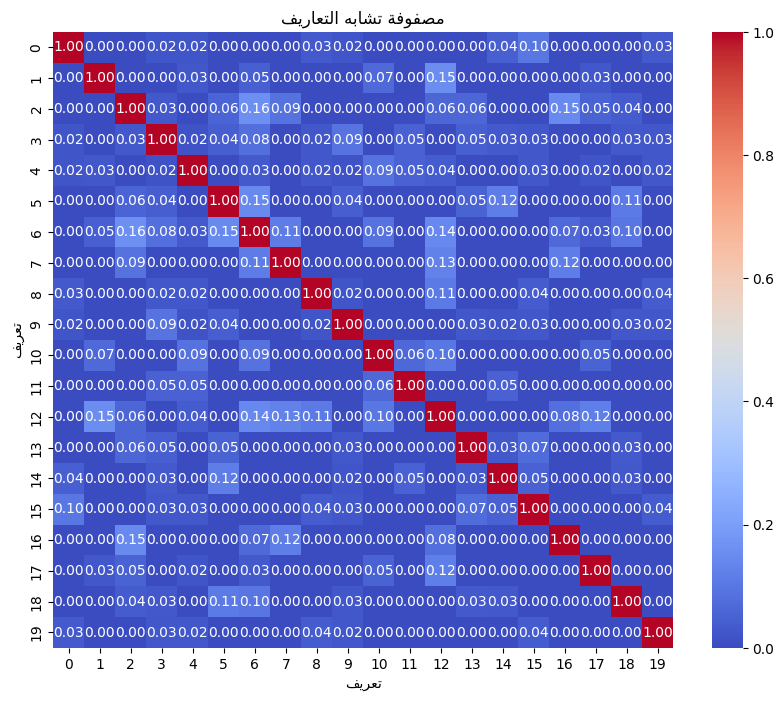

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = dataset_clean["definition"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [24]:
import re

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
         ّ    | # Shadda
         َ    | # Fatha
         ً    | # Tanwin Fath
         ُ    | # Damma
         ٌ    | # Tanwin Damm
         ِ    | # Kasra
         ٍ    | # Tanwin Kasr
         ْ    | # Sukun
         ـ     # Tatwil/Kashida
     """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

def clean_definition(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    # text = re.sub(r'\s*\[[^\]]*\]\s*', ' ', text)
    text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)
    text = re.sub(r'\b\d+[a-zA-Z]*\d*\b', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s+،\s*', '، ', text)
    text = re.sub(r'\s+\.+\s*', '. ', text)
    text = re.sub(r'^[\s\.,،]+|[\s\.,،]+$', '', text)

    text = remove_diacritics(text)

    return text.strip()


In [25]:
def preprocess(row):
    cleaned_definition = clean_definition(row['definition'])
    word_no_diacritics = remove_diacritics(row['word'])
    word_no_diacritics = remove_diacritics(row['word'])
    return pd.Series({
        "input_text": f" صف الكلمة التالية : {word_no_diacritics}",
        "target_text": cleaned_definition
    })

processed_df = dataset_clean.apply(preprocess, axis=1)

In [26]:
processed_df

input_text  \
0                 صف الكلمة التالية : تمنيع ذاتي   
1              صف الكلمة التالية : مسار هاملتوني   
2                     صف الكلمة التالية : الكلمة   
3                        صف الكلمة التالية : طرف   
4                      صف الكلمة التالية : الاسم   
...                                          ...   
58602              صف الكلمة التالية : الاستفهام   
58603          صف الكلمة التالية : السعي إذا كان   
58604                صف الكلمة التالية : الحاجات   
58605              صف الكلمة التالية : مبرد بيني   
58606   صف الكلمة التالية : مبرهنة التمديد لتيتس   

                                             target_text  
0      تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...  
1      مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...  
2      أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...  
3          الجانبي جمع (طرفة) وهو الغريبة من التمر [لغة]  
4      كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...  
...                                                  ...  
58602                      طلب معرفة شيء أو تأكيده [لغة]  
58603  التعبير عن المضي الجري والسعي نحو شيء ما [لغة،...  
58604  المتطلبات الأساسية أو الضرورية للإنسان [اجتماع...  
58605  مبادل حراري لتبريد الهواء بين مراحل الضغط المت...  
58606  مبرهنة تتعلق بتمديد الدوال المستمرة وتختص بمجا...  

[58544 rows x 2 columns]

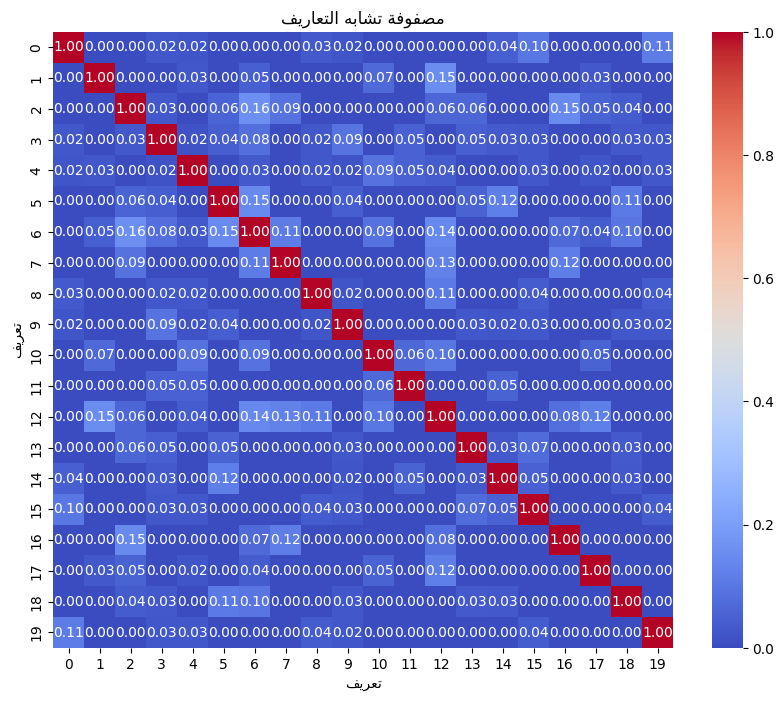

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = processed_df["target_text"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [28]:

unique_defs = set(processed_df["target_text"])
print(f" نسبة التعاريف الفريدة بعد التنظيف: {len(unique_defs) / len(dataset_clean):.2%}")


 نسبة التعاريف الفريدة بعد التنظيف: 99.86%


In [ ]:
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model_name = "UBC-NLP/AraT5-base"
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

In [29]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "flax-community/arabic-t5-small"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [30]:
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = Dataset.from_pandas(processed_df)
dataset_split = dataset.train_test_split(test_size=0.2, seed=42)
temp_split = dataset_split['test'].train_test_split(test_size=0.5, seed=42)

train_dataset = dataset_split['train']
val_dataset = temp_split['train']
test_dataset = temp_split['test']


In [31]:
def preprocess_function(examples):
    inputs = [inp for inp in examples["input_text"]]
    targets = [tgt for tgt in examples["target_text"]]

    model_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors=None
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=128,
            truncation=True,
            padding="max_length",
            return_tensors=None
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val   = val_dataset.map(preprocess_function, batched=True)
tokenized_test  = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/46835 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5854 [00:00<?, ? examples/s]

Map:   0%|          | 0/5855 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-4024811255.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final")

In [ ]:
import torch
torch.cuda.empty_cache()

final_metrics = trainer.evaluate()
print("نتائج التقييم النهائية على مجموعة الاختبار:")
print(final_metrics)
for k, v in final_metrics.items():
    if "rouge" in k:
        print(f"{k}: {v:.2f}")


OutOfMemoryError: CUDA out of memory. Tried to allocate 502.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 280.12 MiB is free. Process 5825 has 14.46 GiB memory in use. Of the allocated memory 14.18 GiB is allocated by PyTorch, and 157.13 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(10):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: : التقرب إلى الله ، ويعبر عن رغبة ورغبة في التقرب من الله إلى الله تعالى
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: 
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: : البرزخ ، البرزخ، والبرزخ، أو البرزخ.
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: 
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: أو كليهما متوازيان متلاصقان أو مساويا ويعبر عن مغامرتيهوي ذاتيا ، ويتكون من مجموعة من المثلثات و المثلثات التي
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: : معامل الامتصاص الخطي وعوامل الامتصاص ، معامل الإمتصاص الخطي، معامل الموجات الامتصاصية، معامل امتصاص الخطي. وعلاوة على ذلك، يتم قياس معامل التشبع في الامتصاص، معامل
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة مسنني
 الإدخال: صف الكلمة التالية : توليوم
 الناتج: : توليوموموموم :
 الإدخال: صف الكلمة التالية : مجرور
 الناتج: مجرور مجرور أو مجرور، مجرور من مجرور إلى الياء
 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: 


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

input_text = "صف الكلمة التالية : الاستدلال "
inputs = tokenizer(input_text, return_tensors="pt", padding=True)

outputs = model.generate(
    inputs["input_ids"],
    max_length=50,
    num_beams=4,
    early_stopping=True
)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("الوصف:", generated_text)


الوصف: : الاستدلال و الاستدلال الاستدلال و الاستدلال : الاستدلال و الاستدلال الاستدلال : الاستدلال : الاستدلال و الاستدلال


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2855101573.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_10e")

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_10e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(10):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    # print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، ويعبر عن نفسه
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مصطلح يستخدم في علم النفس للدلالة على وجود مادة كيميائية، يستخدم في
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: صفة ترمز إلى الله تعالى، ويعبر عن الفطرة
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: هي الصفة التي ترمز إلى الإرث أو الإرث، ويعبر عن الإرث
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: المثلث الذي يتكون من مجموعة من المثلثات التي تتكون من مجموعة متوازية، وتتكون من ثلاثة أضلاع، تستخدم في
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: معامل تستخدم في التحليل الفني لتحليل البيانات
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة مسنني يستخدم للإشارة إلى مجموعة من الإشارات ويعبر عن خصائص معينة
 الإدخال: صف الكلمة التالية : توليوم
 الناتج: عملية تنموهات ويعبر عنها لتنويه
 الإدخال: صف الكلمة التالية : مجرور
 الناتج: اسم يدل على صفة مجرورة بمفعول مجرور
 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستخدم في 

In [ ]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_10e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()
device = "cuda"

data = {'كلمة': [ 'متوسط حسابي']}
df = pd.DataFrame(data)

df['input_text'] = df['كلمة'].apply(lambda x: f"صف الكلمة التالية : {x}")

inputs = tokenizer(list(df['input_text']), return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model.generate(
        input_ids=inputs['input_ids'].to(device),
        attention_mask=inputs['attention_mask'].to(device),
        max_length=60,
        num_beams=1,
        no_repeat_ngram_size=1,
        early_stopping=True
    )

df['وصف'] = [tokenizer.decode(ids, skip_special_tokens=True) for ids in outputs]

print(df[['كلمة', 'وصف']])


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


          كلمة                                                وصف
0  متوسط حسابي  معادلة معينة تحدد مدى فعالية البيانات في الريا...


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
from transformers import TrainerCallback
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=15,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=True,
    warmup_init=True,
    lr=None
)
class CustomTrainer(Trainer):
    def log(self, logs, *args, **kwargs):
        super().log(logs, *args, **kwargs)
        print(f"Step {self.state.global_step}:")
        for key, value in logs.items():
            print(f"  {key}: {value}")

class MetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(f"\n Evaluation results at step {state.global_step}:")
            for key, value in metrics.items():
                print(f"  {key}: {value:.4f}")
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    # optimizers=(optimizer, None),
    compute_metrics=compute_metrics,
    callbacks=[MetricsCallback()]
)

/tmp/ipython-input-3830174978.py:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_15e")

Step 100:
  loss: 2.6539
  grad_norm: 0.1266295611858368
  learning_rate: 2.8918032786885247e-05
  epoch: 0.546448087431694
Step 200:
  loss: 0.6002
  grad_norm: 0.12343886494636536
  learning_rate: 2.7825136612021858e-05
  epoch: 1.092896174863388
Step 300:
  loss: 0.5769
  grad_norm: 0.12654434144496918
  learning_rate: 2.6732240437158472e-05
  epoch: 1.639344262295082
Step 400:
  loss: 0.5657
  grad_norm: 0.12405309826135635
  learning_rate: 2.5639344262295083e-05
  epoch: 2.185792349726776
Step 500:
  loss: 0.5538
  grad_norm: 0.13810022175312042
  learning_rate: 2.4546448087431694e-05
  epoch: 2.73224043715847
Step 600:
  loss: 0.5471
  grad_norm: 0.14914925396442413
  learning_rate: 2.3453551912568308e-05
  epoch: 3.278688524590164
Step 700:
  loss: 0.5383
  grad_norm: 0.14524023234844208
  learning_rate: 2.236065573770492e-05
  epoch: 3.8251366120218577
Step 800:
  loss: 0.5343
  grad_norm: 0.14396966993808746
  learning_rate: 2.126775956284153e-05
  epoch: 4.371584699453552
Ste

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_15e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(20):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يجعل من العبد في حالة عدم الرضا عن نفسه


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في العديد التطبيقات الصناعية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله إلى الله تعالى، وهو من صفات الوجود


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى وجود شيء معين أو غير قابل للكسر


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل طرف في نقطة معينة


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في القياسات الهندسية، حيث يتم قياس قيمة الامتصاص الخطي


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة المنحنيات التي يمكن أن تحدث في الفضاء، مما يؤدي إلى تغير اتجاه معين


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : توليوم
 الناتج: نوى أو منعم


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجرور
 الناتج: حرف جر يدل على 'لا"، ويستخدم في اللغة العربية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستعمل في علم النفس للدلالة على من يتبنى نظرية معينة، مثل: نحوعلم


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الخزلة
 الناتج: صفة من صفات الله تعالى تشير إلى عدم وجود شيء آخر، تستخدم في سياقات دينية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ضرورة
 الناتج: حالة من الصعوبة في تحديد شيء ما، مثل عدم وجود الشيء


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الجنس
 الناتج: مجموعة من الأفراد ينتمون إلى جنس معين، مثل الجنس أو الحيوان


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : عنصر
 الناتج: مادة كيميائية لا يمكن تحليلها إلى مواد أبسط بواسطة عمليات التحلل، وتعتبر من المفاهيم الأساسية في


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الطبع
 الناتج: هو صفة من صفات الله تعالى التي لا يمكن أن تكون في الأصل، أو ما يتعلق بالأحكام الشرعية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الإرادة
 الناتج: القدرة على اتخاذ القرارات أو الخضوع لها


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المادة
 الناتج: كل شيء له كتلة ويشغل حيزا في الفضاء، ويمكن أن تكون المادة جزءا من مجال


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سورة
 الناتج: جزء من القرآن الكريم، يستخدم في اللغة العربية للإشارة إلى الآيات القرآنية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : تطبيق طبولوجي
 الناتج: هو تطبيق طبولوجي لمصطلحات معينة، حيث يتم استخدام الخوارزميات في مجالات مثل
 الإدخال: صف الكلمة التالية : دالة ناقصية
 الناتج: دالة رياضية تمثل قيمة تساوي صفرية، تستخدم في مجالات مثل الجبر والإحصاء


In [35]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
from transformers import TrainerCallback
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=18,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=True,
    warmup_init=True,
    lr=None
)

class CustomTrainer(Trainer):
    def log(self, logs, *args, **kwargs):
        super().log(logs, *args, **kwargs)
        print(f"Step {self.state.global_step}:", flush=True)
        for key, value in logs.items():
            print(f"  {key}: {value}", flush=True)

class MetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(f"\nEvaluation results at step {state.global_step}:", flush=True)
            for key, value in metrics.items():
                print(f"  {key}: {value:.4f}", flush=True)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    # optimizers=(optimizer, None),
    compute_metrics=compute_metrics,
    callbacks=[MetricsCallback()]
)

/tmp/ipython-input-1651847353.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [36]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_18e")

Step 100:
  loss: 2.6546
  grad_norm: 0.13668715953826904
  learning_rate: 2.9098360655737705e-05
  epoch: 0.546448087431694
Step 200:
  loss: 0.6484
  grad_norm: 0.1514028161764145
  learning_rate: 2.818761384335155e-05
  epoch: 1.092896174863388
Step 300:
  loss: 0.6199
  grad_norm: 0.1638859063386917
  learning_rate: 2.7276867030965393e-05
  epoch: 1.639344262295082
Step 400:
  loss: 0.6066
  grad_norm: 0.15091367065906525
  learning_rate: 2.6366120218579237e-05
  epoch: 2.185792349726776
Step 500:
  loss: 0.5927
  grad_norm: 0.16127757728099823
  learning_rate: 2.5455373406193077e-05
  epoch: 2.73224043715847
Step 600:
  loss: 0.5853
  grad_norm: 0.16217881441116333
  learning_rate: 2.454462659380692e-05
  epoch: 3.278688524590164
Step 700:
  loss: 0.5752
  grad_norm: 0.17247678339481354
  learning_rate: 2.3633879781420766e-05
  epoch: 3.8251366120218577
Step 800:
  loss: 0.5705
  grad_norm: 0.17643605172634125
  learning_rate: 2.272313296903461e-05
  epoch: 4.371584699453552
Step 

In [37]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(20):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يتطلبه من فعله. في السياق الديني: هو الإبعاد عن النفس أو العلاقة بين الأفراد


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في التطبيقات الكيميائية والفيزيائية.[الكيمياء العضوية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله الإنسان من حياة وموت، ويعتبر في سياق العقيدة الإسلامية.[التوحيد]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى ما هو غير صحيح أو خاطئ في سياقات متعددة، تستخدم بشكل واسع لوصف العلاقة الجنسية بين الأفراد


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل نقطة في نفس المثلث.[الهندسة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في [الإحصاء] لوصف تأثير الامتصاص الخطي


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة واسعة النطاق تستخدم في التطبيقات الكهربائية، ويعتبر جزءا مهما عن طريق النمذجة.[الكهرومغناطيسية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : توليوم
 الناتج: نوى أو منبع في اللدم، يستخدم كمدخل للحركة والتماسك بين العناصر.[التحليل]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجرور
 الناتج: اسم يدل على حرف جر، ويستخدم في اللغة العربية للإشارة إلى الاسم الذي يطلق عليه لفظ الجلالة أو منصوبا. يستخدم للدلالة عليها


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستعمل في علم النفس للدلالة على من يتبنى فكرة أو مفهوم معين


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الخزلة
 الناتج: صفة تشير إلى عدم وجود شيء أو شخص آخر، مثل الافتقار للشيء. في السياق الديني: هو ما لا يجوز أن يكون له معنى غير مباشر
 الإدخال: صف الكلمة التالية : ضرورة
 الناتج: حالة من عدم وجود شيء معين [لغة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الجنس
 الناتج: ما يتولد من جنس أو شيء، سواء كان في سياقات مختلفة.[لغة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : عنصر
 الناتج: مادة كيميائية لا يمكن تحليلها إلى مواد أبسط بواسطة تفاعل كيميائي، مثل الذرات أو الكائنات الحية. يستخدم في الكيمياء لوصف المواد الكيميائية والفيزيائية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الطبع
 الناتج: هو صفة من صفات الله تعالى التي لا يمكن أن تكون في سياقات دينية أو أدبية، ويعتبر جزءا أساسيا منها.[أسماء]
 الإدخال: صف الكلمة التالية : الإرادة
 الناتج: القدرة على اتخاذ قرار أو إجراء معين [فلسفة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المادة
 الناتج: كل ما له كتلة ويشغل حيزا في الفضاء، ويمكن أن تكون المادة أو المواد بناءة على خصائص معينة.[علوم طبيعية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سورة
 الناتج: سورة أو السورة التي تقرأ القرآن، وتعتبر جزءا من الكتاب المقدس في الإسلام.[دين]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : تطبيق طبولوجي
 الناتج: تطبيق طبولوجي لدالة معينة، حيث يتم استخدام الخوارزميات في دراسة المواد والآلات. يستخدم هذا المصطلح لوصف سلوك الأجسام أو الكائنات الحية
 الإدخال: صف الكلمة التالية : دالة ناقصية
 الناتج: هي دالة رياضية تقاس قيمتها ناقصا، تستخدم في مجالات مثل الجبر والإلكترونيات


In [38]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(30):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يتطلبه من فعله. في السياق الديني: هو الإبعاد عن النفس أو العلاقة بين الأفراد


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في التطبيقات الكيميائية والفيزيائية.[الكيمياء العضوية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله الإنسان من حياة وموت، ويعتبر في سياق العقيدة الإسلامية.[التوحيد]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى ما هو غير صحيح أو خاطئ في سياقات متعددة، تستخدم بشكل واسع لوصف العلاقة الجنسية بين الأفراد


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل نقطة في نفس المثلث.[الهندسة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في [الإحصاء] لوصف تأثير الامتصاص الخطي


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة واسعة النطاق تستخدم في التطبيقات الكهربائية، ويعتبر جزءا مهما عن طريق النمذجة.[الكهرومغناطيسية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : توليوم
 الناتج: نوى أو منبع في اللدم، يستخدم كمدخل للحركة والتماسك بين العناصر.[التحليل]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجرور
 الناتج: اسم يدل على حرف جر، ويستخدم في اللغة العربية للإشارة إلى الاسم الذي يطلق عليه لفظ الجلالة أو منصوبا. يستخدم للدلالة عليها


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستعمل في علم النفس للدلالة على من يتبنى فكرة أو مفهوم معين


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الخزلة
 الناتج: صفة تشير إلى عدم وجود شيء أو شخص آخر، مثل الافتقار للشيء. في السياق الديني: هو ما لا يجوز أن يكون له معنى غير مباشر


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ضرورة
 الناتج: حالة من عدم وجود شيء معين [لغة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الجنس
 الناتج: ما يتولد من جنس أو شيء، سواء كان في سياقات مختلفة.[لغة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : عنصر
 الناتج: مادة كيميائية لا يمكن تحليلها إلى مواد أبسط بواسطة تفاعل كيميائي، مثل الذرات أو الكائنات الحية. يستخدم في الكيمياء لوصف المواد الكيميائية والفيزيائية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الطبع
 الناتج: هو صفة من صفات الله تعالى التي لا يمكن أن تكون في سياقات دينية أو أدبية، ويعتبر جزءا أساسيا منها.[أسماء]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الإرادة
 الناتج: القدرة على اتخاذ قرار أو إجراء معين [فلسفة]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المادة
 الناتج: كل ما له كتلة ويشغل حيزا في الفضاء، ويمكن أن تكون المادة أو المواد بناءة على خصائص معينة.[علوم طبيعية]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سورة
 الناتج: سورة أو السورة التي تقرأ القرآن، وتعتبر جزءا من الكتاب المقدس في الإسلام.[دين]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : تطبيق طبولوجي
 الناتج: تطبيق طبولوجي لدالة معينة، حيث يتم استخدام الخوارزميات في دراسة المواد والآلات. يستخدم هذا المصطلح لوصف سلوك الأجسام أو الكائنات الحية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : دالة ناقصية
 الناتج: هي دالة رياضية تقاس قيمتها ناقصا، تستخدم في مجالات مثل الجبر والإلكترونيات


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : السحر
 الناتج: هو ما يسحر به الإنسان من شر، ويعتبر في سياقات دينية أو فكرية. يعتبر هذا المفهوم غير صحيح


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : دالة كثافة الاحتمالية
 الناتج: دالة رياضية تستخدم في حساب أطوال البيانات، حيث يتم قياسها باستخدام عدد من القيم.[الإحصاء]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : عقد النكاح
 الناتج: عقد شرعي يتضمن منافع شرعية للزوجين، ويعتبر من أركان الإسلام الأساسية في الفقه الإسلامي. يعتبر الزواج أحد أشكاله حكما على المرأة


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجموعة بيانات إيريس
 الناتج: مجموعة بيانات تستخدم لتصنيف البيانات في نموذج تعلم الآلة، حيث يتم تعريفها بشكل خاص


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : اشتقاق
 الناتج: عملية تبريد مادة جديدة أو أكثر من مرة أخرى، تستخدم في مجالات مثل الكيمياء العضوية والفيزيائية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : نقيبا
 الناتج: شخص يرشح نفسه للترقي في عمله أو مهامه، ويعتبر من أهم مصادر التعليم.[اجتماع]


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : العقيدة
 الناتج: مجموعة من المعتقدات والمفاهيم التي تعبر عن فكرة أو مفهوم معين، وتعتبر أساسا في علم النفس


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : موشور رباعي الزوايا
 الناتج: موشور يستخدم في الدوائر الكهربائية، حيث يتم قياس الزوايا بين النقاط والزوايا. تستخدم لوصف الأبعاد الهندسية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجموعة
 الناتج: مجموعة من العناصر أو الأجزاء التي يمكن أن تكون ذات خصائص معينة، تستخدم في مجالات مثل الكيمياء العضوية
 الإدخال: صف الكلمة التالية : الهرج
 الناتج: هرج أو عدم المبالاة بالأمور، وهو ما لا يمكن أن يكون في سياقات دينية.[العقيدة الإسلامية]


In [32]:
!pip install datasets

In [33]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.1 MB/s eta 0:00:00


In [34]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=c1c3285288ca39ea6f1238d376f8190bd6dec902da6a7324903a3744e0622a06
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
